In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Generation of images

For the generation of images, we simply use the code that was given with the subject. Every image size will be 72.

In [12]:
IMAGE_SIZE = 72
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [13]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


In [14]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)


In [15]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

Let's visualize a rectangle, a disk and a triangle

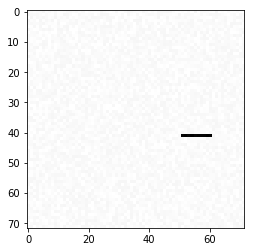

In [16]:

im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

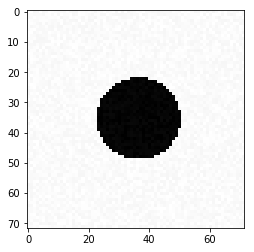

In [17]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

Only with generate a triangle we will get the specific position of the triangle which will be useful afterwards for the last part. 

[0.5, 0.868139072212696, 0.868139072212696, 0.1318609277873039, 0.1318609277873039, 0.1318609277873039]


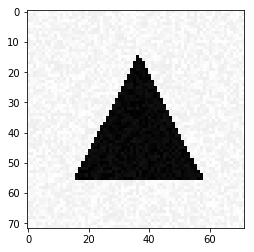

In [18]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
print (v)

# Generation of a dataset

Again, this code was entirely given in the code with the subject.It generates the training and testing set.

In [19]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [20]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = to_categorical(Y_test, 3) 
    ## retourne une matrice avec chaque ligne qui correspond a un Y, sur chaque ligne Yij=1 si Yi appartient à la classe j
    return [X_test, Y_test]

In [21]:
# REGRESSION DES TRIANGLES (renvoie le triangle et la position de ses vertices)
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]



In [22]:
import matplotlib.patches as patches
##RENVOIE SUR UNE MEME IMAGE LE TRIANGLE ET LE TRIANGLE FAIT AVEC CONTOURS
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    plt.show()
 

In [23]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

[X_test,Y_test]=generate_test_set_regression()
print(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
[[0.94133439 0.93818117 0.67661723 0.27556678 0.36340393 0.33217252]
 [0.49350036 0.81401674 0.17839825 0.77686033 0.51306942 0.78858177]
 [0.23325432 0.15415605 0.5149824  0.45317341 0.32182751 0.87390724]
 ...
 [0.90236089 0.08107216 0.0619128  0.90561447 0.3103926  0.44943384]
 [0.02978994 0.76471819 0.18268838 0.11404042 0.36227032 0.29758231]
 [0.4368798  0.9453302  0.49367468 0.12558218 0.43904587 0.99037645]]


In [37]:
##Training set generation and formating into the desired input for the following model
from keras.utils.np_utils import to_categorical as to_categorical
[X_train, Y_train] = generate_dataset_classification(300, 20)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


Now that we have a training a a testing set, we can do deep learning model in order to predict the classification in the 3 categories (circle, triangle, rectangle). The first will use the SGD Optimizer. We are using here a very simple model:
first we have to reshape the data (X, and Y into the to_categorical shape). The in the model we add a dense of output shape 3 (since we need 3 categories), and the input will be the shape of X. We complile it and then we fit it to our training set. We use a learning rate of 0.01 of the SGD optimizer, to have pretty small steps.As suggested we use specific functions of activation (softmax), and a loss measure (categorical crossentropy). In order to see the evolution of our prediction with the epoch, we measure accuracy each time. We can see here that it converges to 64% which is a good value but we will hope to get better with the Adam Optimizer, a better optimizer. 

In [38]:
#Model generation : SGD optimization

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
shape_X=X_train.shape[1]
Y_train_c=to_categorical(Y_train)
model.add(Dense(3,activation='softmax',input_shape=(shape_X,)))
sgd=SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train_c,batch_size=32,epochs=10,verbose=1)


Epoch 1/10
300/300 [==============================] - 0s 898us/step - loss: 6.5815 - acc: 0.3400
Epoch 2/10
300/300 [==============================] - 0s 130us/step - loss: 8.1531 - acc: 0.3367
Epoch 3/10
300/300 [==============================] - 0s 100us/step - loss: 6.4033 - acc: 0.5233
Epoch 4/10
300/300 [==============================] - 0s 100us/step - loss: 5.7998 - acc: 0.5967
Epoch 5/10
300/300 [==============================] - 0s 100us/step - loss: 6.2300 - acc: 0.5067
Epoch 6/10
300/300 [==============================] - 0s 103us/step - loss: 5.8611 - acc: 0.5900
Epoch 7/10
300/300 [==============================] - 0s 120us/step - loss: 5.6679 - acc: 0.6433
Epoch 8/10
300/300 [==============================] - 0s 106us/step - loss: 5.7252 - acc: 0.6300
Epoch 9/10
300/300 [==============================] - 0s 120us/step - loss: 5.6623 - acc: 0.6433
Epoch 10/10
300/300 [==============================] - 0s 116us/step - loss: 5.6606 - acc: 0.6433


We test here our model with a circle in order to see in which category it is classified. Here it gives a wrong classification (not that often but I decided to show it to compare it to the next optimizer). 

In [48]:
#testing the model on a circle
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

We adapt here our code in order to test the Adam Optimizer. The model stays the same otherwise. We can see that this model is far better since the accuracy converges to 98%. 

In [49]:
#Model generation : Adam optimization

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import adam

model = Sequential()
shape_X=X_train.shape[1]
Y_train_c=to_categorical(Y_train)
model.add(Dense(3,activation='softmax',input_shape=(shape_X,)))
adam_o=adam(lr=0.001)
model.compile(optimizer=adam_o, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train_c,batch_size=32,epochs=10)

Epoch 1/10
300/300 [==============================] - 0s 967us/step - loss: 1.6442 - acc: 0.4567
Epoch 2/10
300/300 [==============================] - 0s 96us/step - loss: 0.9588 - acc: 0.5900
Epoch 3/10
300/300 [==============================] - 0s 120us/step - loss: 0.5625 - acc: 0.7700
Epoch 4/10
300/300 [==============================] - 0s 96us/step - loss: 0.4209 - acc: 0.8200
Epoch 5/10
300/300 [==============================] - 0s 126us/step - loss: 0.4239 - acc: 0.8000
Epoch 6/10
300/300 [==============================] - 0s 100us/step - loss: 0.3844 - acc: 0.7967
Epoch 7/10
300/300 [==============================] - 0s 103us/step - loss: 0.3010 - acc: 0.8433
Epoch 8/10
300/300 [==============================] - 0s 103us/step - loss: 0.2312 - acc: 0.9233
Epoch 9/10
300/300 [==============================] - 0s 100us/step - loss: 0.1965 - acc: 0.9767
Epoch 10/10
300/300 [==============================] - 0s 136us/step - loss: 0.1694 - acc: 0.9867


We test our model on a disk again. This time, by trying this code many times, we can witness less errors than with SGD optimizer.

In [50]:
#testing the model
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

We check the function, store it input a variable and extract the first part:

In [51]:
#weights of our model

w=model.get_weights()
ima=w[0]


Then we print the first column:

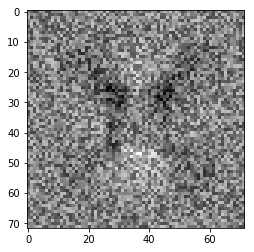

In [52]:
# First column 
ima_1=ima[:,0]
plt.imshow(ima_1.reshape(72,72), cmap='gray')

The second column:

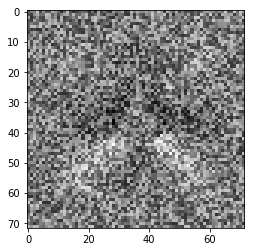

In [53]:
# Second column
ima_2=ima[:,1]
plt.imshow(ima_2.reshape(72,72), cmap='gray')

And lastly the third column:

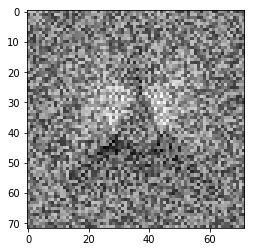

In [54]:
# Third column
ima_3=ima[:,2]
plt.imshow(ima_3.reshape(72,72), cmap='gray')



# A more difficult classification problem : Problem n°2, using 2 models for a more complex classification

Now we will train a more difficult model. First we generate a new training set.

In [82]:
[X_train_2, Y_train_2] = generate_dataset_classification(300, 20, True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


Our new model will use directly the Adam Optimizer because it was more efficient. Now we use more than one layer : we will first retrain our previous model (linear) in order to compare the new one to this one's results. With the linear model we get an accuracy of 58%.

In [83]:
#New model generation : Adam optimization with Linear model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import adam

model_2 = Sequential()
shape_X=X_train_2.shape[1]
Y_train_2_c=to_categorical(Y_train_2)
model_2.add(Dense(3,activation='softmax',input_shape=(shape_X,)))
adam_o=adam(lr=0.001)
model_2.compile(optimizer=adam_o, loss='categorical_crossentropy',metrics=['accuracy'])
model_2.fit(X_train_2,Y_train_2_c,batch_size=32,epochs=10)


Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 2.7923 - acc: 0.3167
Epoch 2/10
300/300 [==============================] - 0s 163us/step - loss: 1.7888 - acc: 0.3133
Epoch 3/10
300/300 [==============================] - 0s 123us/step - loss: 1.2873 - acc: 0.4167
Epoch 4/10
300/300 [==============================] - 0s 123us/step - loss: 0.9996 - acc: 0.4767
Epoch 5/10
300/300 [==============================] - 0s 113us/step - loss: 0.9441 - acc: 0.5067
Epoch 6/10
300/300 [==============================] - 0s 126us/step - loss: 0.9244 - acc: 0.5500
Epoch 7/10
300/300 [==============================] - 0s 130us/step - loss: 1.0019 - acc: 0.5267
Epoch 8/10
300/300 [==============================] - 0s 110us/step - loss: 1.0467 - acc: 0.5400
Epoch 9/10
300/300 [==============================] - 0s 116us/step - loss: 0.9840 - acc: 0.5067
Epoch 10/10
300/300 [==============================] - 0s 136us/step - loss: 0.8422 - acc: 0.5767


In [84]:
[X_test_2, Y_test_2] = generate_test_set_classification()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [85]:
model_2.evaluate(X_test_2, Y_test_2)


300/300 [==============================] - 0s 984us/step


[0.8916682481765748, 0.5466666666666666]

We get an accuracy of 55% which is rather low. We will try to get better  results with a convolutional model.

Next we create our convulationnal model on the same training set with an Adam Optimization.First we shape the training data, then we build our model.
we use the Conv2D layer, a convulational layer. We use 16 filters in the first layer with a kernel size of (5,5), which performed well when we tried it, then a pooling layer to reduce dimensionality. Then we convert the 2D output to an array (the shape of the output) with Flatten before the final softmax classification (as it has provided the best result in our testing session)

In [154]:
# Convolutional model on the same training set with Adam optimization
from keras.layers import Conv2D, MaxPooling2D, Flatten

X_train_2 = X_train_2.reshape(X_train_2.shape[0], 72, 72, 1)
model_2_conv=Sequential()
model_2_conv.add(Conv2D(16, (5, 5), activation='relu',input_shape=(72, 72, 1)))
model_2_conv.add(MaxPooling2D(pool_size=(2,2)))
model_2_conv.add(Flatten())
model_2_conv.add(Dense(3,activation='softmax'))
model_2_conv.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_2_conv.fit(X_train_2,Y_train_2_c,batch_size=32,epochs=10)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 1.0733 - acc: 0.4300
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8242 - acc: 0.7533
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.7522 - acc: 0.6567
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6409 - acc: 0.7500
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5706 - acc: 0.8167
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5158 - acc: 0.8367
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4655 - acc: 0.8600
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.5106 - acc: 0.7733
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4198 - acc: 0.8433
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3927 - acc: 0.8700


We seem to get better results. Let's evaluate this with the same testing set used for the linear model. 

In [156]:
X_test_2 = X_test_2.reshape(X_test_2.shape[0], 72, 72, 1)
model_2_conv.evaluate(X_test_2, Y_test_2)

300/300 [==============================] - 1s 3ms/step


[0.6418332091967265, 0.75]

Indeed we now get an accuracy of 75% which is better than in the linear model.

# A regression problem : Problem n°3 using only one model

We are now going to tackle a more difficult problem of regression. We first generate a daset triangle and its position of edges. We are trying here to guess the true image of triangle (ie lines that will connect the edges) based on its pixels. 

In [87]:
[X_train_3, Y_train_3] = generate_dataset_regression(300, 20)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In this visualization we can see the pixels and the shape we want to regress.

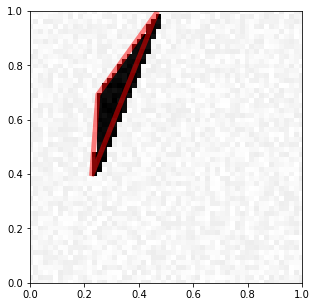

In [88]:
visualize_prediction(X_train_3[0], Y_train_3[0])

In order to solve this problem, since the coordinates of the triangle are not normalized, a way to "normalize" them will be to convert them in polar coordinate. So we will create functions that will convert from cartesian to polar and reciproquely so that the model we will apply will take as an input the Y_train corresponding to polar coordinates instead of cartesian. 

In [89]:
# Need to compute polar instead of cartesian coordinates (and cartesian to polar)

import numpy as np

def cart2pol (y_train):
    x_1=y_train[:,0]
    y_1=y_train[:,1]
    rho_1 = np.sqrt(x_1**2 + y_1**2)
    phi_1 = np.arctan2(y_1, x_1)
    x_2=y_train[:,2]
    y_2=y_train[:,3]
    rho_2 = np.sqrt(x_2**2 + y_2**2)
    phi_2 = np.arctan2(y_2, x_2)
    x_3=y_train[:,4]
    y_3=y_train[:,5]
    rho_3 = np.sqrt(x_3**2 + y_3**2)
    phi_3 = np.arctan2(y_3, x_3)
    return(np.c_[rho_1,phi_1,rho_2,phi_2,rho_3,phi_3])

def pol2cart(polar_y_train):
    rho_1 = polar_y_train[:,0]
    phi_1 = polar_y_train[:,1]
    x_1 = rho_1 * np.cos(phi_1)
    y_1 = rho_1 * np.sin(phi_1)
    rho_2 = polar_y_train[:,2]
    phi_2 = polar_y_train[:,3]
    x_2 = rho_2* np.cos(phi_2)
    y_2 = rho_2 * np.sin(phi_2)
    rho_3 = polar_y_train[:,4]
    phi_3 = polar_y_train[:,5]
    x_3 = rho_3 * np.cos(phi_3)
    y_3 = rho_3 * np.sin(phi_3)
    return(np.c_[x_1,y_1,x_2,y_2,x_3,y_3])

Now we will apply to those new inputs (polar coordinates and pixels) our second model with convolutional layers. I just changed the parameter of conv2D (32 filters instead of 16) because I noticed the results were better in this case and used an output of dense equal to 6 since we have two coordinate per edge to guess. 

In [90]:
# Regressor model using a convolutionnal model, adam optimizer

model_3 = Sequential()
X_train_3=X_train_3.reshape(X_train_reg.shape[0], 72, 72, 1)
Y_train_3=cart2pol(Y_train_3)
model_3.add(Conv2D(32, (5, 5), activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(6,activation='softmax'))
adam_o=adam(lr=0.001)
model_3.compile(optimizer=adam_o, loss='categorical_crossentropy',metrics=['accuracy'])
model_3.fit(X_train_3,Y_train_3,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 10.4119 - acc: 0.1633
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 8.5212 - acc: 0.2033
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 8.1969 - acc: 0.3100
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 8.1221 - acc: 0.3967
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 8.0566 - acc: 0.4233
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 8.0124 - acc: 0.4933
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 7.9640 - acc: 0.5733
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 7.9262 - acc: 0.6133
Epoch 9/10
300/300 [==============================] - 1s 5ms/step - loss: 7.8912 - acc: 0.6867
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 7.8720 - acc: 0.6900


We seem to get rather good results (accuaracy of 69%). Now we will test our regression model. 

In [104]:
# Testing our regression model
[X_test_3, Y_test_3] = generate_test_set_regression()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [105]:
#testing our regression model
X_test_3=X_test_3.reshape(X_train_3.shape[0], 72, 72, 1)
Y_test_3=cart2pol(Y_test_3)
evaluation=model_3.evaluate(X_test_3,Y_test_3)
print("loss",evaluation[0],"accuracy", evaluation[1])

300/300 [==============================] - 1s 2ms/step
loss 8.361196873982747 accuracy 0.27000000019868214


We get an accuracy of 27% which is rather low compared to what we obtained so far. This problem is more complex though since we want to guess 3 coordinates that can take many values (an not only 3 values which will only be 0 or 1). 

# Image denoising : Problem n°4

In this image denoising issue, we will re-compute all the visualization functions previously used but modifying few parameters. For image denoising we want to generate two drawings, one of which will be noisy. the function generate_a_drawing2 now needs to have as an output a list of two lists of pixels corresponding to two images. The classification function also will be modified as it needs now to compute two lists everytime since the output of generate_a_drawing2 is a different size. We have to be careful that in this scenario the first coordinate is the "real image" and the second is the "noisy image" and we will want to get the real image (Y) from the noisy image (X). This implies that the X_train,Y_train will correspond an output [imdata2,imdata1] 

In [127]:
def generate_a_drawing2(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata2 = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return [imdata,imdata2]

def generate_a_rectangle2(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing2(figsize, U, V, noise)


def generate_a_disk2(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing2(figsize, U, V, noise)

def generate_a_triangle2(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_a_drawing2(figsize, U, V, noise)


def generate_dataset_classification2(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            [Y[i],X[i]] = generate_a_rectangle2(noise, free_location)
        elif category == 1: 
            [Y[i],X[i]] = generate_a_disk2(noise, free_location)
        else:
            [Y[i],X[i]] = generate_a_triangle2(noise, free_location)
        
    X = (X + noise) / (255 + 2 * noise)
    Y=Y/255
    return [X,Y]

In [128]:
[X_train_4,Y_train_4]=generate_dataset_classification2(300, noise=8, free_location=True)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In order to visualize this, we can first see the first real image generated (Y_train[0]), which is a triangle. 

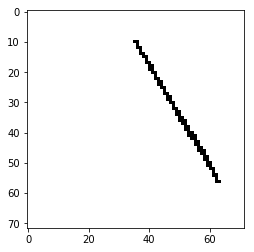

In [130]:
plt.imshow(Y_train_4[5].reshape(72,72), cmap='gray')

And now we can see the noisy version of the same image X_train[0]

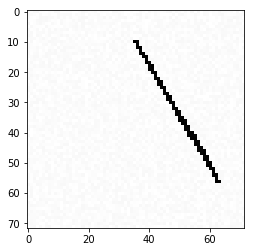

In [131]:
plt.imshow(X_train_4[5].reshape(72,72), cmap='gray')

We will now use again the model we used previously Now the Dense have an output of 72* 72 since we have to guess every pixel of the image. In order to make our model work better we used a validation split of 0.1 (training on 270 samples and validating the results obtained on 30 samples). 

In [138]:
X_train_4 = X_train_4.reshape(X_train_4.shape[0], 72, 72, 1)
model_4=Sequential()
model_4.add(Conv2D(4, (3, 3), activation='relu',input_shape=(72, 72, 1)))
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Flatten())
model_4.add(Dense(5184))
model_4.compile(optimizer='adam',loss='mean_absolute_error')
model_4.fit(X_train_4,Y_train_4,batch_size=32,epochs=10,validation_split=0.1)

Train on 270 samples, validate on 30 samples
Epoch 1/10
270/270 [==============================] - 8s 29ms/step - loss: 1.0417 - val_loss: 0.7612
Epoch 2/10
270/270 [==============================] - 6s 22ms/step - loss: 0.5541 - val_loss: 0.4048
Epoch 3/10
270/270 [==============================] - 6s 23ms/step - loss: 0.3373 - val_loss: 0.2680
Epoch 4/10
270/270 [==============================] - 6s 23ms/step - loss: 0.2396 - val_loss: 0.2168
Epoch 5/10
270/270 [==============================] - 6s 23ms/step - loss: 0.1894 - val_loss: 0.1745
Epoch 6/10
270/270 [==============================] - 6s 23ms/step - loss: 0.1597 - val_loss: 0.1617
Epoch 7/10
270/270 [==============================] - 7s 25ms/step - loss: 0.1440 - val_loss: 0.1459
Epoch 8/10
270/270 [==============================] - 6s 24ms/step - loss: 0.1331 - val_loss: 0.1418
Epoch 9/10
270/270 [==============================] - 6s 23ms/step - loss: 0.1249 - val_loss: 0.1366
Epoch 10/10
270/270 [=========================

In [146]:
[X_test_4,Y_test_4]=generate_dataset_classification2(10, noise=2, free_location=True)

Creating data:
0


In [147]:
X_test_4 = X_test_4.reshape(X_test_4.shape[0], 72, 72, 1)
Y_test_4_predict=model_4.predict(X_test_4)

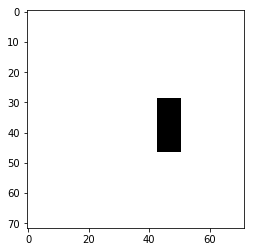

In [148]:
plt.imshow(Y_test_4[1].reshape(72,72), cmap='gray')

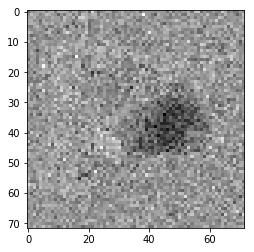

In [149]:
plt.imshow(Y_test_4_predict[1].reshape(72,72), cmap='gray')

We can see that our model can create an image that will be in the same area as the real one but the form is quite blurry. We tested the model with different noise value and it gets better with a lower value. 